<a href="https://colab.research.google.com/github/Niloofar-SecML/Security_Experiment/blob/main/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print("tensorflow is version: ", tf.__version__)
print("Keras is version: ", keras.__version__)

tensorflow is version:  2.18.0
Keras is version:  3.8.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Print the shapes and types
print('X_train_full shape: ', X_train_full.shape, 'X_train_full type: ', X_train_full.dtype)
print('y_train_full shape: ', y_train_full.shape, 'y_train_full type: ', y_train_full.dtype)
print('X_test shape: ', X_test.shape, 'X_test type: ', X_test.dtype)
print('y_test shape:', y_test.shape, 'y_test type:', y_test.dtype)

X_train_full shape:  (60000, 28, 28) X_train_full type:  uint8
y_train_full shape:  (60000,) y_train_full type:  uint8
X_test shape:  (10000, 28, 28) X_test type:  uint8
y_test shape: (10000,) y_test type: uint8


In [ ]:
X_valid, X_train = X_train_full[50000:] / 255.0, X_train_full[:50000] / 255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) #model compiling

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)) #train model

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6769 - loss: 1.0312 - val_accuracy: 0.8169 - val_loss: 0.5408
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8229 - loss: 0.5137 - val_accuracy: 0.8340 - val_loss: 0.4621
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8416 - loss: 0.4535 - val_accuracy: 0.8407 - val_loss: 0.4524
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8547 - loss: 0.4177 - val_accuracy: 0.8400 - val_loss: 0.4391
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8583 - loss: 0.3993 - val_accuracy: 0.8586 - val_loss: 0.4084
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8612 - loss: 0.3909 - val_accuracy: 0.8222 - val_loss: 0.4853
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8680 - loss: 0.3771 - val_accuracy: 0.8621 - val_loss: 0.3936
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8696 - loss: 0

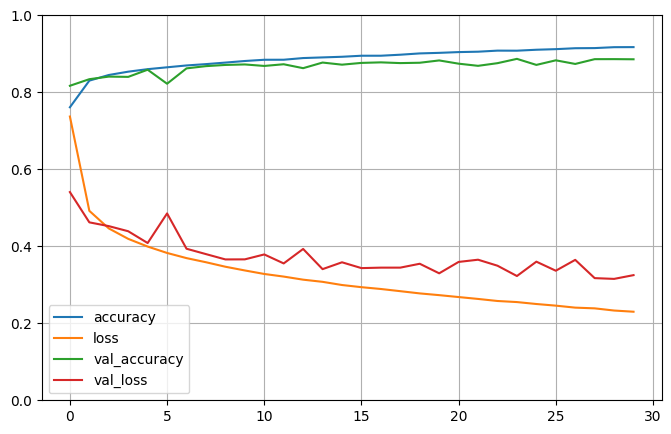

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test/255, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8772 - loss: 0.3415


[0.3445844352245331, 0.8762000203132629]